# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [43]:
# Mount the Google drive
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries of image recognition
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical









**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.17.1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Load the SVHN dataset
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U4EZP5_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U4EZP5_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.U4EZP5_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


Check the number of images in the training and the testing dataset.

In [ ]:
#Check number of images

# Access the element_spec to get the shape information
train_data_shape = tf.compat.v1.data.get_output_shapes(ds_train)
test_data_shape = tf.compat.v1.data.get_output_shapes(ds_test)

# Print the shape information
print("Train data shape:", train_data_shape)
print("Test data shape:", test_data_shape)

Train data shape: (TensorShape([32, 32, 3]), TensorShape([]))
Test data shape: (TensorShape([32, 32, 3]), TensorShape([]))


**Observation:**  The training and test datasets are the same size.  They are maxtrices of 32 X 32 X 3.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

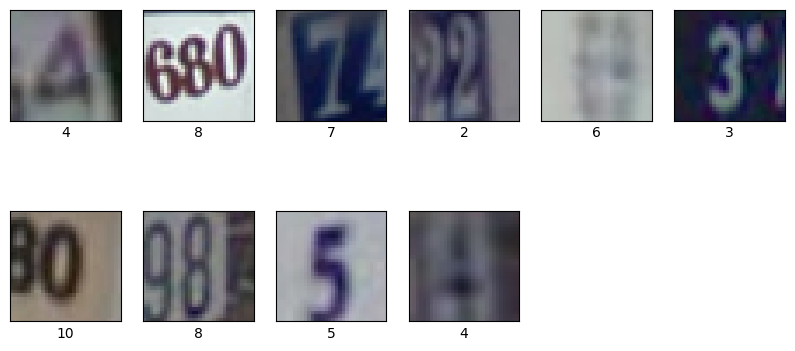

In [ ]:
X_train = ds_train.map(lambda x, y: x)
y_train = ds_train.map(lambda x, y: y)

# Convert the datasets to lists for indexing
X_train_list = list(X_train.as_numpy_iterator())
y_train_list = list(y_train.as_numpy_iterator())

class_names_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Access elements from the list instead of the dataset
    plt.imshow(X_train_list[i], cmap=plt.cm.binary)

    plt.xlabel(class_names_list[y_train_list[i] -1 ])

plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:

#Print shape of array for the first image
print("Shape of the first image:", X_train_list[0].shape)

#Print the pixel array for the firsst image
print("Pixel array of the first image:\n", X_train_list[0])

Shape of the first image: (32, 32, 3)
Pixel array of the first image:
 [[[126 138 136]
  [128 138 137]
  [129 139 138]
  ...
  [ 19  19  19]
  [ 19  21  20]
  [ 19  21  20]]

 [[127 139 137]
  [127 139 137]
  [129 140 138]
  ...
  [ 19  21  20]
  [ 19  21  20]
  [ 17  21  20]]

 [[128 140 139]
  [127 139 138]
  [128 138 137]
  ...
  [ 19  21  20]
  [ 20  22  21]
  [ 17  21  20]]

 ...

 [[ 91  89  96]
  [ 76  75  83]
  [ 69  68  77]
  ...
  [ 94  96  91]
  [ 68  70  65]
  [ 43  45  42]]

 [[ 81  78  87]
  [ 70  68  78]
  [ 66  65  76]
  ...
  [ 99 100  95]
  [ 73  75  70]
  [ 48  48  46]]

 [[ 73  70  79]
  [ 66  64  74]
  [ 66  65  75]
  ...
  [102 106 101]
  [ 78  80  75]
  [ 52  52  50]]]


### **Normalize the train and the test data**

In [ ]:

# Normalize the train and the test dataset
X_train_normalized = np.array(X_train_list) / 255.0
X_test = ds_test.map(lambda x, y: x)
X_test_list = list(X_test.as_numpy_iterator())
X_test_normalized = np.array(X_test_list) / 255.0

print("New shape of the train dataset:", X_train_normalized.shape)
print("New shape of the test dataset:", X_test_normalized.shape)

New shape of the train dataset: (73257, 32, 32, 3)
New shape of the test dataset: (26032, 32, 32, 3)


Print the shapes of Training and Test data

In [ ]:
#Print the shape of the training and test data.
print("New shape of the train dataset:", X_train_normalized.shape)
print("New shape of the test dataset:", X_test_normalized.shape)

New shape of the train dataset: (73257, 32, 32, 3)
New shape of the test dataset: (26032, 32, 32, 3)


### **One-hot encode output**

In [ ]:
#One hot encode output

y_train_encoded = to_categorical(np.array(y_train_list) - 1, num_classes=10)

y_test = ds_test.map(lambda x, y: y)
y_test_list = list(y_test.as_numpy_iterator())
y_test_encoded = to_categorical(np.array(y_test_list) - 1, num_classes=10)

print("Shape of encoded y_train:", y_train_encoded.shape)
print("Shape of encoded y_test:", y_test_encoded.shape)

Shape of encoded y_train: (73257, 10)
Shape of encoded y_test: (26032, 10)


**Observation:** the dataset has been encoded into a matrix of size 73257 X 10 for the training data and 26032 X 10 for the test data set.  This encoding converted any categorical data to numerical for easier processing.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
tf.random.set_seed(42)


### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
#Build and train an ANN model

def nn_model_1():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Reshape the data
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

model_1 = nn_model_1()
print(model_1.summary())

history_1 = model_1.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,082 (777.66 KB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1868 - loss: 2.2445 - val_accuracy: 0.3002 - val_loss: 1.9565
Epoch 2/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3350 - loss: 1.8820 - val_accuracy: 0.4453 - val_loss: 1.6603
Epoch 3/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4683 - loss: 1.5891 - val_accuracy: 0.5119 - val_loss: 1.4757
Epoch 4/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5289 - loss: 1.4341 - val_accuracy: 0.5336 - val_loss: 1.4215
Epoch 5/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5535 - loss: 1.3704 - val_accuracy: 0.5507 - val_loss: 1.3809
Epoch 6/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5671 - loss: 1.3371 - val_accuracy: 0.5715 - val_loss: 1.3324
Epoch 7/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5760 - loss: 1.3143 - val_accuracy: 0.5812 - val_loss: 1.3115
Epoch 8/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5820 - loss: 1.2973 - val_accu

### **Plot the Training and Validation Accuracies and write down your Observations.**

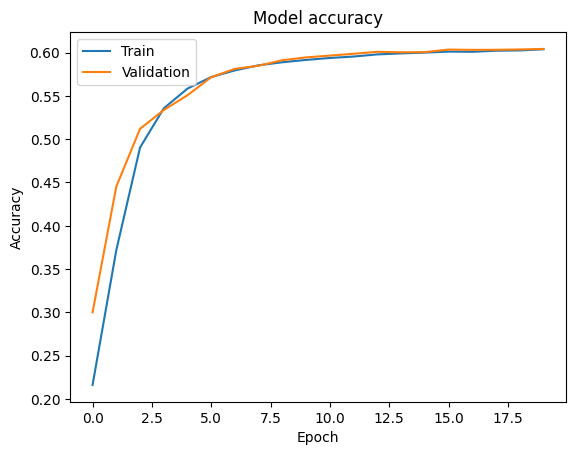

In [ ]:
# Plot the training and validation accuracies
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



**Observations: By epoch 6 the training data meets the validation data and starts to level off.  Since there is no significant difference between the training and the validation data, overfitting is not suspected.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend.

tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(43)
tf.random.set_seed(43)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

### **Plot the Training and Validation Accuracies and write down your Observations.**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834,538 (3.18 MB)

 Trainable params: 834,474 (3.18 MB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.1496 - loss: 2.3263 - val_accuracy: 0.1825 - val_loss: 2.2382
Epoch 2/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.1900 - loss: 2.2383 - val_accuracy: 0.1855 - val_loss: 2.2370
Epoch 3/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1901 - loss: 2.2372 - val_accuracy: 0.1622 - val_loss: 2.3269
Epoch 4/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2745 - loss: 2.0060 - val_accuracy: 0.4616 - val_loss: 1.6412
Epoch 5/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5292 - loss: 1.4064 - val_accuracy: 0.5902 - val_loss: 1.2981
Epoch 6/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6038 - loss: 1.2212 - val_accuracy: 0.6196 - val_loss: 1.1749
Epoch 7/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6382 - loss: 1.1263 - val_accuracy: 0.6624 - val_loss: 1.0671
Epoch 8/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6611 - loss: 1.067

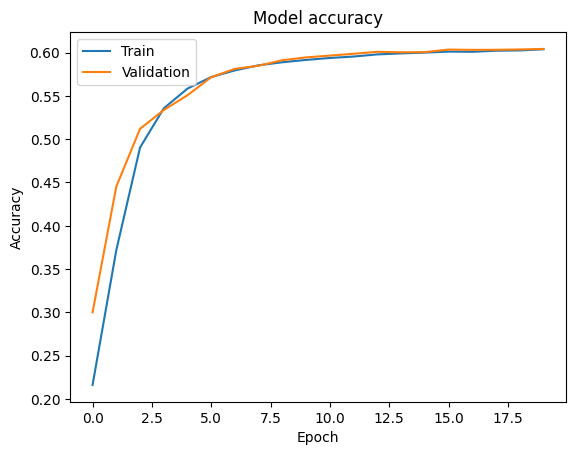

In [ ]:
# Build and train an ANN model

def nn_model_2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model


model_2 = nn_model_2()
print(model_2.summary())

history_2 = model_2.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

# Plot the training and validation accuracies
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: while more epochs were added, the accuracy of the model is similar to the first model.  The accuracy levels off by epoch 6 and since the training data and validation data are close, there is no overfitting.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
#Make predictions on the test set using the second model

y_pred = model_2.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))



814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      5099
           1       0.76      0.80      0.78      4149
           2       0.70      0.61      0.65      2882
           3       0.79      0.77      0.78      2523
           4       0.66      0.68      0.67      2384
           5       0.59      0.70      0.64      1977
           6       0.71      0.70      0.71      2019
           7       0.61      0.54      0.58      1660
           8       0.63      0.63      0.63      1595
           9       0.68      0.67      0.67      1744

    accuracy                           0.72     26032
   macro avg       0.70      0.69      0.69     26032
weighted avg       0.72      0.72      0.72     26032

[[4256  182  108  107   51   69  134   56   42   94]
 [ 137 3314   96   83   82   73  206   62   68   28]
 [ 206  211 1747   55  249   48   70   90  159   47]
 [  96   77   58 1932   54  130   19   38

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert each entry of y_test to a single label.

y_true = np.argmax(y_test_encoded, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
#Print the classification report and the confusion matrix for the test predictions

y_pred = model_2.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      5099
           1       0.76      0.80      0.78      4149
           2       0.70      0.61      0.65      2882
           3       0.79      0.77      0.78      2523
           4       0.66      0.68      0.67      2384
           5       0.59      0.70      0.64      1977
           6       0.71      0.70      0.71      2019
           7       0.61      0.54      0.58      1660
           8       0.63      0.63      0.63      1595
           9       0.68      0.67      0.67      1744

    accuracy                           0.72     26032
   macro avg       0.70      0.69      0.69     26032
weighted avg       0.72      0.72      0.72     26032

[[4256  182  108  107   51   69  134   56   42   94]
 [ 137 3314   96   83   82   73  206   62   68   28]
 [ 206  211 1747   55  249   48   70   90  159   47]
 [  96   77   58 1932   54  130   19   38

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:

# Load the SVHN dataset
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Check the number of images in the training and the testing dataset.

In [ ]:
# Check the number of images in the training and the testing dataset

# Access the element_spec to get the shape information
train_data_shape = tf.compat.v1.data.get_output_shapes(ds_train)
test_data_shape = tf.compat.v1.data.get_output_shapes(ds_test)

# Print the shape information
print("Train data shape:", train_data_shape)
print("Test data shape:", test_data_shape)

Train data shape: (TensorShape([32, 32, 3]), TensorShape([]))
Test data shape: (TensorShape([32, 32, 3]), TensorShape([]))


**Observation: The training and test data shape is the same as it was in the prior separation.**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.

print("Shape of the first image:", X_train_list[0].shape)
print("Pixel array of the first image:\n", X_train_list[0])

Shape of the first image: (32, 32, 3)
Pixel array of the first image:
 [[[126 138 136]
  [128 138 137]
  [129 139 138]
  ...
  [ 19  19  19]
  [ 19  21  20]
  [ 19  21  20]]

 [[127 139 137]
  [127 139 137]
  [129 140 138]
  ...
  [ 19  21  20]
  [ 19  21  20]
  [ 17  21  20]]

 [[128 140 139]
  [127 139 138]
  [128 138 137]
  ...
  [ 19  21  20]
  [ 20  22  21]
  [ 17  21  20]]

 ...

 [[ 91  89  96]
  [ 76  75  83]
  [ 69  68  77]
  ...
  [ 94  96  91]
  [ 68  70  65]
  [ 43  45  42]]

 [[ 81  78  87]
  [ 70  68  78]
  [ 66  65  76]
  ...
  [ 99 100  95]
  [ 73  75  70]
  [ 48  48  46]]

 [[ 73  70  79]
  [ 66  64  74]
  [ 66  65  75]
  ...
  [102 106 101]
  [ 78  80  75]
  [ 52  52  50]]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the dataset to be able to pass them to CNNs.
X_train_reshaped = X_train_normalized.reshape(-1, 32, 32, 3)
X_test_reshaped = X_test_normalized.reshape(-1, 32, 32, 3)

print("New shape of the train dataset:", X_train_reshaped.shape)
print("New shape of the test dataset:", X_test_reshaped.shape)

New shape of the train dataset: (73257, 32, 32, 3)
New shape of the test dataset: (26032, 32, 32, 3)


Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train_normalized = np.array(X_train_list) / 255.0
X_test_normalized = np.array(X_test_list) / 255.0

Print New shape of Training and Test

In [ ]:
# Print New shape of Training and Test

print("New shape of the train dataset:", X_train_reshaped.shape)
print("New shape of the test dataset:", X_test_reshaped.shape)

New shape of the train dataset: (73257, 32, 32, 3)
New shape of the test dataset: (26032, 32, 32, 3)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encode the labels in the target variable y_train and y_test
y_train_encoded = to_categorical(np.array(y_train_list) - 1, num_classes=10)
y_test_encoded = to_categorical(np.array(y_test_list) - 1, num_classes=10)

print("Shape of encoded y_train:", y_train_encoded.shape)
print("Shape of encoded y_test:", y_test_encoded.shape)

Shape of encoded y_train: (73257, 10)
Shape of encoded y_test: (26032, 10)


**Observation: the matrix has gone from a 4-d matrix to a 2D matrix.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
np.random.seed(47)
tf.random.set_seed(47)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
#Build and train a CNN model

def cnn_model_1():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model_cnn_1 = cnn_model_1()
print(model_cnn_1.summary())

history_cnn_1 = model_cnn_1.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,594 (1.02 MB)

 Trainable params: 267,594 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 123s 67ms/step - accuracy: 0.5426 - loss: 1.3632 - val_accuracy: 0.8453 - val_loss: 0.5454
Epoch 2/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - accuracy: 0.8505 - loss: 0.5174 - val_accuracy: 0.8590 - val_loss: 0.4924
Epoch 3/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 122s 66ms/step - accuracy: 0.8742 - loss: 0.4319 - val_accuracy: 0.8654 - val_loss: 0.4787
Epoch 4/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - accuracy: 0.8900 - loss: 0.3767 - val_accuracy: 0.8643 - val_loss: 0.4975
Epoch 5/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 140s 66ms/step - accuracy: 0.9014 - loss: 0.3357 - val_accuracy: 0.8669 - val_loss: 0.5042
Epoch 6/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.9103 - loss: 0.3013 - val_accuracy: 0.8641 - val_loss: 0.5315
Epoch 7/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 144s 67ms/step - accuracy: 0.9204 - loss: 0.2719 - val_accuracy: 0.8683 - val_loss: 0.5427
Epoch 8/20
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 121s 66ms/step - accur

### **Plot the Training and Validation Accuracies and Write your observations.**

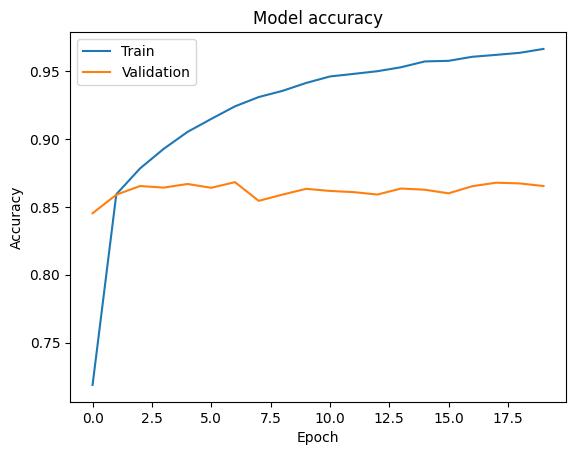

In [ ]:
# Plot the training and validation accuracies
plt.plot(history_cnn_1.history['accuracy'])
plt.plot(history_cnn_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Observations:This model is over fitted as there is a significant difference between the training and validation data.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing the backend

tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(53)
tf.random.set_seed(53)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:


def cnn_model_2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model_cnn_2 = cnn_model_2()
print(model_cnn_2.summary())

history_cnn_2 = model_cnn_2.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,338 (606.79 KB)

 Trainable params: 155,178 (606.16 KB)

 Non-trainable params: 160 (640.00 B)

None
Epoch 1/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.5075 - loss: 1.4891 - val_accuracy: 0.8309 - val_loss: 0.5828
Epoch 2/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.8097 - loss: 0.6352 - val_accuracy: 0.8666 - val_loss: 0.4571
Epoch 3/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 128s 70ms/step - accuracy: 0.8368 - loss: 0.5412 - val_accuracy: 0.8823 - val_loss: 0.4103
Epoch 4/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.8526 - loss: 0.4903 - val_accuracy: 0.8847 - val_loss: 0.4131
Epoch 5/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 128s 70ms/step - accuracy: 0.8632 - loss: 0.4559 - val_accuracy: 0.8821 - val_loss: 0.4283
Epoch 6/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 157s 78ms/step - accuracy: 0.8717 - loss: 0.4208 - val_accuracy: 0.8926 - val_loss: 0.3838
Epoch 7/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 196s 75ms/step - accuracy: 0.8762 - loss: 0.4013 - val_accuracy: 0.8969 - val_loss: 0.3904
Epoch 8/30
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 128s 68ms/step - accur

### **Plot the Training and Validation accuracies and write your observations.**

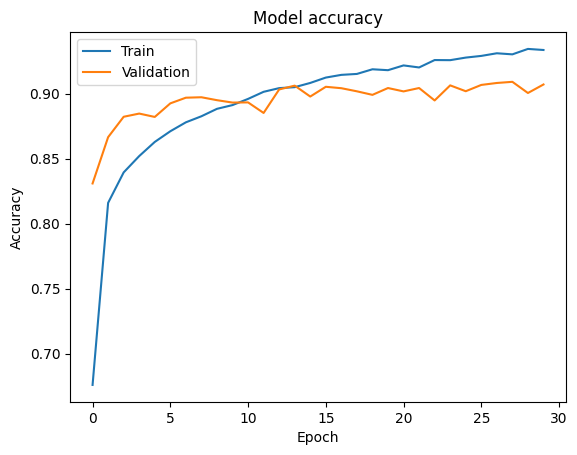

In [ ]:
# Plot the training and validation accuracies
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: There is a gap between the training and the validation accuracy.  There seems to be a lot of noise in the validation, which means we may have overfitted the model.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make predictions on the test data using the second model

y_pred = model_cnn_2.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)


print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

814/814 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5099
           1       0.93      0.91      0.92      4149
           2       0.84      0.85      0.85      2882
           3       0.93      0.90      0.91      2523
           4       0.87      0.91      0.89      2384
           5       0.90      0.84      0.87      1977
           6       0.92      0.89      0.90      2019
           7       0.84      0.83      0.83      1660
           8       0.79      0.87      0.83      1595
           9       0.89      0.89      0.89      1744

    accuracy                           0.89     26032
   macro avg       0.88      0.88      0.88     26032
weighted avg       0.89      0.89      0.89     26032

[[4784   29   43   64   16   11   70   12   11   59]
 [  62 3784  115   35   20   10   38   27   49    9]
 [  66   72 2450   10   84   12   11   56  114    7]
 [ 105   24   27 2274   11   12   10   

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert each entry of y_test to a single label

y_true = np.argmax(y_test_encoded, axis=1)

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:The ANN model was a better fit for this data as the CNN model seem to result is overfitting.**